# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Send the browser to the URL
browser.visit(url)

# Save the HTML from the browser
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser')

In [5]:
# Find the table
table = html_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Define the dataframe and its columns
df = pd.DataFrame(columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp','pressure'])

# Collect data
for row in table.tbody.find_all('tr'):
    
    # Find data for each column based on row
    columns = row.find_all('td') 
    
    # Make sure columns aren't empty and then extract data
    if(columns != []): 
        id = columns[0].text.strip()
        terrestrial_date = columns[1].text.strip()
        sol = columns[2].text.strip()
        ls = columns[3].text.strip()
        month = columns[4].text.strip()
        min_temp = columns[5].text.strip()
        pressure = columns[6].text.strip()

        # Create a new row and add it to the end of the dataframe
        df_new_row = pd.DataFrame({'id':[id], 'terrestrial_date':[terrestrial_date], 'sol':[sol], 'ls':[ls], 'month':[month], 'min_temp':[min_temp],'pressure':[pressure]})
        df = pd.concat([df, df_new_row])

In [7]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
0,13,2012-08-17,11,156,6,-76.0,740.0
0,24,2012-08-18,12,156,6,-76.0,741.0
0,35,2012-08-19,13,157,6,-74.0,732.0
0,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
0,1889,2018-02-23,1973,133,5,-78.0,730.0
0,1892,2018-02-24,1974,134,5,-77.0,729.0
0,1894,2018-02-25,1975,134,5,-76.0,729.0
0,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'], format="%Y-%m-%d")


cols = df.columns.drop('terrestrial_date')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


# 1. How many months are there on Mars?


In [11]:
# 1. How many months are there on Mars?
df['month'].nunique()

12

In [12]:
# 3. What is the average low temperature by month?
average_temp = df.groupby('month')['min_temp'].mean()
average_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

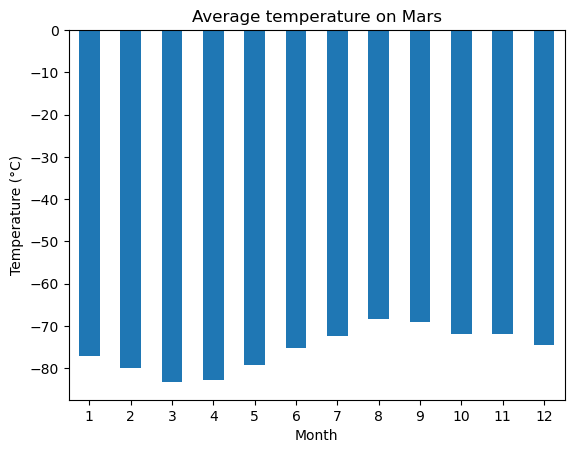

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the average temperature by month
temp_chart = average_temp.plot(kind="bar", title="Average temperature on Mars", rot=0)
temp_chart.set_xlabel("Month")
temp_chart.set_ylabel("Temperature (°C)")

plt.show()
plt.tight_layout()

In [14]:
# Identify the coldest and hottest months in Curiosity's location
print(f'''
The coldest month was month {average_temp.idxmin()}, with a temperature of {round(average_temp.min(),2)}°C.
The hotest month was month {average_temp.idxmax()}, with a temperature of {round(average_temp.max(),2)}°C.
''')


The coldest month was month 3, with a temperature of -83.31°C.
The hotest month was month 8, with a temperature of -68.38°C.



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



In [15]:
# 4. Average pressure by Martian month
average_press = df.groupby('month')['pressure'].mean()
average_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

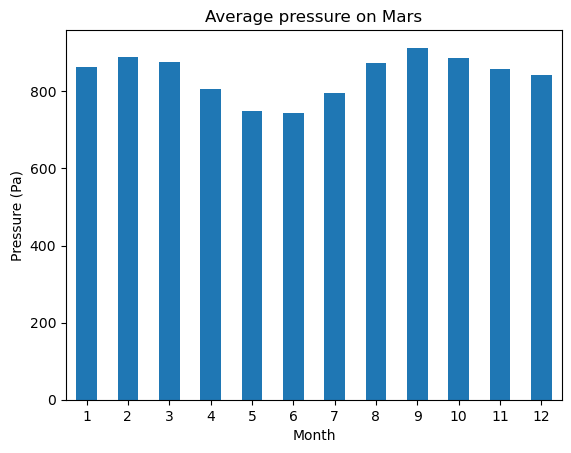

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the average pressure by month
press_chart = average_press.plot(kind="bar", title="Average pressure on Mars", rot=0)
press_chart.set_xlabel("Month")
press_chart.set_ylabel("Pressure (Pa)")

plt.show()
plt.tight_layout()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

In [127]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Sort the data so that it is arranged according to ls and date
df_sorted = df.sort_values(by=['ls','terrestrial_date'])

# Start date for the first day of month 1
yr1_start_m1 = df_sorted[df_sorted.month==1].iloc[0]['terrestrial_date']

# Start date for the first occurance of month 2
yr1_start_m2 = df_sorted[df_sorted.month==2].iloc[0]['terrestrial_date']

# Get rid of year 1's month 1 using the start date of month 2 
df_trimmed = df_sorted[df_sorted.terrestrial_date >= yr1_start_m2].sort_values(by=['terrestrial_date'])

# Then, find the next occurance of month 1, which should now be the start date of year 2 in the trimmed, sorted data
yr2_start_m1 = df_trimmed[df_trimmed.month==1].iloc[0]['terrestrial_date']

# Find how many days lapsed between the starting date for year 1 and 2
earth_days = yr2_start_m1-yr1_start_m1

print(f'''
There are {earth_days.days} days on Earth within one Martian year. 
''')



There are 687 days on Earth within one Martian year. 



Text(0.5, 1.0, 'Daily Minimum Temperature')

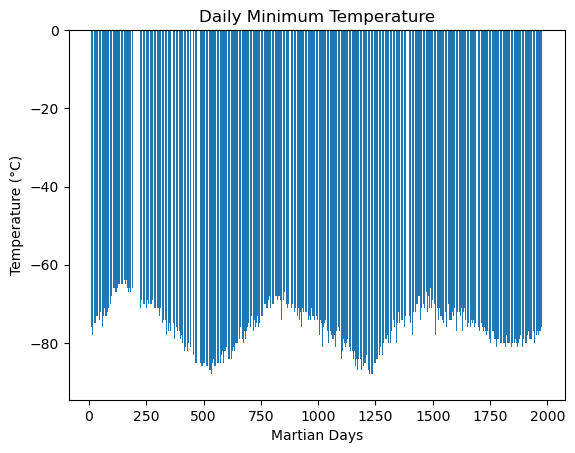

In [131]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Martian Days")
plt.ylabel("Temperature (°C)")

# Create title 
plt.title('Daily Minimum Temperature')

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [132]:
# Write the data to a CSV
df.to_csv('Resources/mars.csv',index=False)

In [133]:
browser.quit()